In [5]:
import pandas as pd 
%matplotlib inline

In [2]:
data = pd.read_csv('/coffees.csv')

In [3]:
data.coffees = pd.to_numeric(data.coffees, errors='coerce')
data = data.dropna()
data.coffees = data.coffees.astype(int)
data.timestamp = pd.to_datetime(data.timestamp)
# print(data.describe(include='all'))
data[:5]

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


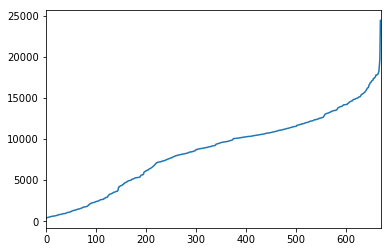

In [6]:
data.coffees.plot()

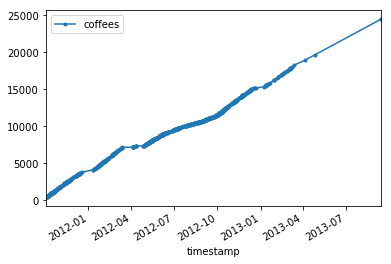

In [7]:
data.plot(x=data.timestamp, style='.-')

In [12]:
#data.tail(n=1-)
#data[data.timestamp < '2013-03-01']
data = data[data.timestamp < '2013-03-01']
data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


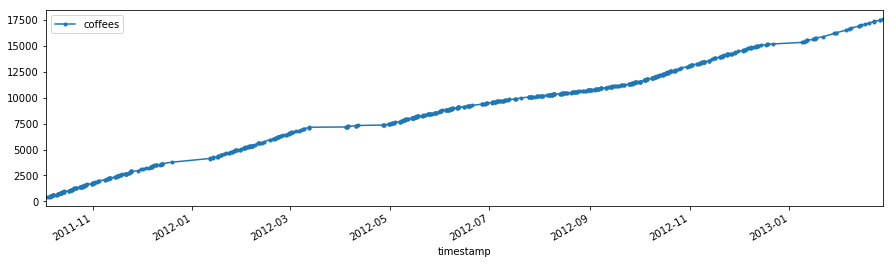

In [14]:
data.plot(x=data.timestamp, style='.-', figsize=(15,4))

In [15]:
data.contributor.value_counts()

Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

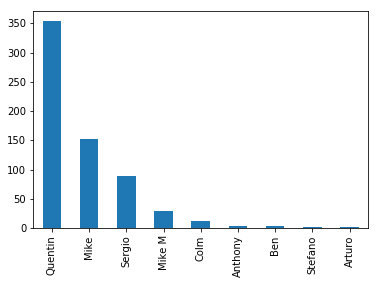

In [16]:
data.contributor.value_counts().plot(kind='bar')

In [17]:
weekdays = data.timestamp.dt.weekday

In [19]:
data = data.assign(weekdays = weekdays)
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,0
1,2011-10-04 11:48:00,410,Quentin,1
4,2011-10-05 10:47:00,464,Quentin,2
5,2011-10-05 13:15:00,481,Quentin,2
6,2011-10-06 07:21:00,503,Anthony,3


In [21]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_dict = {key:weekday_names[key] for key in range(7)}
def day_of_week(idx):
    return weekday_dict[idx]

data.weekdays = data.weekdays.apply(day_of_week)
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


In [25]:
weekday_counts = data.groupby('weekdays').count()

weekday_counts = weekday_counts.loc[weekday_names]

weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


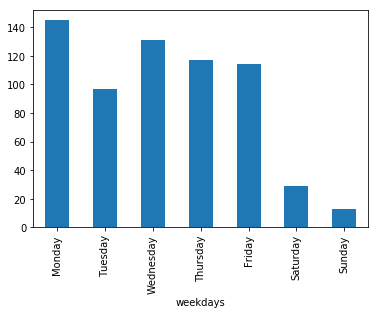

In [27]:
weekday_counts.coffees.plot(kind='bar')

In [28]:
data.index = data.timestamp
data.index

DatetimeIndex(['2011-10-03 08:22:00', '2011-10-04 11:48:00',
               '2011-10-05 10:47:00', '2011-10-05 13:15:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               '2011-10-06 12:14:00', '2011-10-06 12:49:00',
               '2011-10-06 14:52:00', '2011-10-07 07:34:00',
               ...
               '2013-02-12 08:36:00', '2013-02-12 11:39:00',
               '2013-02-13 13:58:00', '2013-02-16 11:55:00',
               '2013-02-18 13:46:00', '2013-02-21 13:44:00',
               '2013-02-21 15:02:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', name='timestamp', length=646, freq=None)

In [29]:
data.head()

,timestamp,coffees,contributor,weekdays
timestamp,,,,
2011-10-03 08:22:00,2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,2011-10-06 07:21:00,503,Anthony,Thursday


In [30]:
data.drop(['timestamp'], axis=1, inplace=True)
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


In [31]:
data.index

DatetimeIndex(['2011-10-03 08:22:00', '2011-10-04 11:48:00',
               '2011-10-05 10:47:00', '2011-10-05 13:15:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               '2011-10-06 12:14:00', '2011-10-06 12:49:00',
               '2011-10-06 14:52:00', '2011-10-07 07:34:00',
               ...
               '2013-02-12 08:36:00', '2013-02-12 11:39:00',
               '2013-02-13 13:58:00', '2013-02-16 11:55:00',
               '2013-02-18 13:46:00', '2013-02-21 13:44:00',
               '2013-02-21 15:02:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', name='timestamp', length=646, freq=None)

In [35]:
midnights = pd.date_range(data.index[0], data.index[-1], freq='D', normalize=True)

midnights

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

In [36]:
new_index = midnights.union(data.index)

new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

In [57]:
upsampled_data = data.reindex(new_index)
upsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


In [64]:
upsampled_data = upsampled_data.interpolate(method='time')
upsampled_data.head(10)


,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Monday
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tuesday
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wednesday
2011-10-05 13:15:00,481.000000,Quentin,Wednesday
2011-10-06 00:00:00,494.066298,NaN,NaN
2011-10-06 07:21:00,503.000000,Anthony,Thursday
2011-10-06 10:04:00,513.000000,Quentin,Thursday
